# 统计学习方法（第一版） 习题解答
**撰写人：**胡锐锋-天国之影-Relph  
**github地址：**[https://github.com/Relph1119/StatisticalLearningMethod-Camp](https://github.com/Relph1119/StatisticalLearningMethod-Camp)
## 第1章统计学习方法概论-习题

### 习题1.1
&emsp;&emsp;说明伯努利模型的极大似然估计以及贝叶斯估计中的统计学习方法三要素。伯努利模型是定义在取值为0与1的随机变量上的概率分布。假设观测到伯努利模型$n$次独立的数据生成结果，其中$k$次的结果为1，这时可以用极大似然估计或贝叶斯估计来估计结果为1的概率。

**解答：**

伯努利模型的极大似然估计以及贝叶斯估计中的**统计学习方法三要素**如下：  
1. **极大似然估计**  
**模型：** $\mathcal{F}=\{f|f_p(x)=p^x(1-p)^{(1-x)}\}$  
**策略：** 最大化似然函数  
**算法：** $\displaystyle \mathop{\arg\min}_{p} L(p)= \mathop{\arg\min}_{p} \binom{n}{k}p^k(1-p)^{(n-k)}$
2. **贝叶斯估计**  
**模型：** $\mathcal{F}=\{f|f_p(x)=p^x(1-p)^{(1-x)}\}$  
**策略：** 求参数期望  
**算法：**
$$\begin{aligned}  E_\pi\big[p \big| y_1,\cdots,y_n\big]
& = {\int_0^1}p\pi (p|y_1,\cdots,y_n) dp \\
& = {\int_0^1} p\frac{f_D(y_1,\cdots,y_n|p)\pi(p)}{\int_{\Omega}f_D(y_1,\cdots,y_n|p)\pi(p)dp}dp \\
& = {\int_0^1}\frac{p^{k+1}(1-p)^{(n-k)}}{\int_0^1 p^k(1-p)^{(n-k)}dp}dp
\end{aligned}$$

**伯努利模型的极大似然估计：**  
定义$P(Y=1)$概率为$p$，可得似然函数为：$$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{n}{k}p^k(1-p)^{(n-k)}$$方程两边同时对$p$求导，则：$$\begin{aligned}
0 & = \binom{n}{k}[kp^{k-1}(1-p)^{(n-k)}-(n-k)p^k(1-p)^{(n-k-1)}]\\
& = \binom{n}{k}[p^{(k-1)}(1-p)^{(n-k-1)}(m-kp)]
\end{aligned}$$可解出$p$的值为$p=0,p=1,p=k/n$，显然$\displaystyle P(Y=1)=p=\frac{k}{n}$  

**伯努利模型的贝叶斯估计：**  
定义$P(Y=1)$概率为$p$，$p$在$[0,1]$之间的取值是等概率的，因此先验概率密度函数$\pi(p) = 1$，可得似然函数为： $$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{n}{k}p^k(1-p)^{(n-k)}$$  
根据似然函数和先验概率密度函数，可以求解$p$的条件概率密度函数：$$\begin{aligned}\pi(p|y_1,\cdots,y_n)&=\frac{f_D(y_1,\cdots,y_n|p)\pi(p)}{\int_{\Omega}f_D(y_1,\cdots,y_n|p)\pi(p)dp}\\
&=\frac{p^k(1-p)^{(n-k)}}{\int_0^1p^k(1-p)^{(n-k)}dp}\\
&=\frac{p^k(1-p)^{(n-k)}}{B(k+1,n-k+1)}
\end{aligned}$$所以$p$的期望为：$$\begin{aligned}
E_\pi[p|y_1,\cdots,y_n]&={\int}p\pi(p|y_1,\cdots,y_n)dp \\
& = {\int_0^1}\frac{p^{(k+1)}(1-p)^{(n-k)}}{B(k+1,n-k+1)}dp \\
& = \frac{B(k+2,n-k+1)}{B(k+1,n-k+1)}\\
& = \frac{k+1}{n+2}
\end{aligned}$$
$\therefore \displaystyle P(Y=1)=\frac{k+1}{n+2}$

### 习题1.2
&emsp;&emsp;通过经验风险最小化推导极大似然估计。证明模型是条件概率分布，当损失函数是对数损失函数时，经验风险最小化等价于极大似然估计。

**解答：**

假设模型的条件概率分布是$P_{\theta}(Y|X)$，现推导当损失函数是对数损失函数时，极大似然估计等价于经验风险最小化。
极大似然估计的似然函数为：$$L(\theta)=\prod_D P_{\theta}(Y|X)$$两边取对数：$$\ln L(\theta) = \sum_D \ln P_{\theta}(Y|X) \\ 
\mathop{\arg \max}_{\theta} \sum_D \ln P_{\theta}(Y|X) = \mathop{\arg \min}_{\theta} \sum_D (- \ln P_{\theta}(Y|X))$$ 
反之，经验风险最小化等价于极大似然估计，亦可通过经验风险最小化推导极大似然估计。

## 第2章感知机-习题

### 习题2.1
&emsp;&emsp;Minsky 与 Papert 指出：感知机因为是线性模型，所以不能表示复杂的函数，如异或 (XOR)。验证感知机为什么不能表示异或。

**解答：**  

对于异或函数XOR，全部的输入与对应的输出如下：  

$x^{(1)}$ | $x^{(2)}$ | $y$  
:---: | :---: | :---:   
&nbsp;1&nbsp; | &nbsp;1&nbsp; |&nbsp;-1&nbsp;  
&nbsp;1&nbsp; | &nbsp;-1&nbsp; | &nbsp;1&nbsp;  
&nbsp;-1&nbsp; | &nbsp;1&nbsp; | &nbsp;1&nbsp;  
&nbsp;-1&nbsp; | &nbsp;-1&nbsp; | &nbsp;-1&nbsp;  

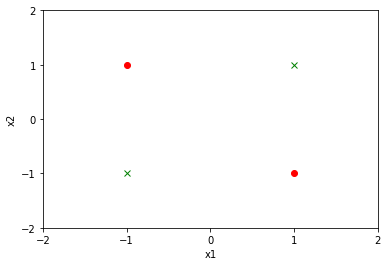

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x1 = [1, 1, -1, -1]
x2 = [1, -1, 1, -1]
y = [-1, 1, 1, -1]
x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)
data = np.c_[x1, x2, y]
data = pd.DataFrame(data, index=None, columns=['x1', 'x2', 'y'])
data.head()

positive = data.loc[data['y'] == 1]
negative = data.loc[data['y'] == -1]

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xticks([-2, -1, 0, 1, 2])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(positive['x1'], positive['x2'], "ro")
plt.plot(negative['x1'], negative['x2'], "gx")
plt.show()

显然感知机无法使用一条直线将两类样本划分，异或问题是线性不可分的。

### 习题2.2

&emsp;&emsp;模仿例题 2.1，构建从训练数据求解感知机模型的例子。

**解答：**

In [2]:
from sklearn.linear_model import Perceptron
import numpy as np

X_train = np.array([[3, 3], [4, 3], [1, 1]])
y = np.array([1, 1, -1])

perceptron_model = Perceptron()
perceptron_model.fit(X_train, y)
print("w:", perceptron_model.coef_, "\nb:", perceptron_model.intercept_, "\n")

result = perceptron_model.predict(X_train)
print(result)

w: [[1. 0.]] 
b: [-2.] 

[ 1  1 -1]


### 习题2.3
证明以下定理：样本集线性可分的充分必要条件是正实例点所构成的凸壳与负实例点所构成的凸壳互不相交。

**解答：**  
**第1步：**首先给出凸壳与线性可分的定义，定义如下：  
**凸壳**  
**定义1：**设集合$S \subset R^n$，是由$R^n$中的$k$个点所组成的集合，即$S=\{x_1,x_2,\cdots, x_k\}$。定义$S$的凸壳$\text{conv}(S)$为：$$\text{conv}(S) = \left\{ x = \sum_{i=1}^k \lambda_i x_i \Big| \sum_{i=1}^k \lambda_i=1,\lambda_i \geqslant 0, i=1,2,\cdots, k \right\}$$说明：凸壳是一个集合，对于所有可能的$\lambda_i,i=1,2,\cdots,k$只要满足$\displaystyle \sum_{i=1}^k \lambda_i = 1$，那么$\displaystyle x = \sum_{i=1}^k$即为凸壳中的元素，凸壳可以用二维的图形表示如下：
<br/><center>
<img style="border-radius: 0.3125em;box-shadow: 0 2px 4px 0 rgba(34,36,38,.12),0 2px 10px 0 rgba(34,36,38,.08);" src="../images/2-1-Convex-Hull.png"><br><div style="color:orange; border-bottom: 1px solid #d9d9d9;display: inline-block;color: #000;padding: 2px;">图2.1 凸壳</div></center>

**线性可分**  
**定义2：**给定一个数据集$$T=\{(x_1,y_1), (x_2,y_2), \cdots, (x_n,y_n)\}$$其中$x_i \in \mathcal{X}=R_n, y_i \in \mathcal{Y} = \{+1, -1\}, i=1,2,\cdots, n$，如果存在某个超平面$S：w \cdot x + b = 0$，能够将数据集的正实例点和负实例点完全正确划分到超平面的两侧，即对所有的正实例点即$y_i=+1$的实例$i$，有$w \cdot x_i + b > 0$，对所有的负实例点即$y_i = -1$的实例$i$，有$w \cdot x_i + b < 0$，则称数据集$T$线性可分，否则称数据集$T$线性不可分。  

----

**第2步：** 证明必要性：线性可分$\Rightarrow$凸壳不相交  
假设数据集$T$中的正例点集为$S_+$，$S_+$的凸壳为$\text{conv}(S_+)$，负实例点集为$S_-$，$S_-$的凸壳为$\text{conv}(S_-)$，若$T$是线性可分的，则存在一个超平面：$$w \cdot x + b = 0$$能够将$S_+$和$S_-$完全分离。假设对于所有的正例点$x_i$，有：$$w \cdot x_i + b = \varepsilon_i$$易知$\varepsilon_i > 0, i = 1,2,\cdots,|S_+|。$若$\text{conv}(S_+)$和$\text{conv}(S_-)$相交，即存在某个元素$s$，同时满足$s \in \text{conv}(S_+)$和$s \in \text{conv}(S_-)$。  
对于$\text{conv}(S_+)$中的元素$s^+$有$$w \cdot s^+ = w \cdot \sum_{i=1}^k \lambda_i x_i = \sum_{i=1}^k \lambda_i(\varepsilon_i - b) = \sum_{i=1}^k \lambda_i \varepsilon_i - b $$因此$\displaystyle w \cdot s^+ + b = \sum_{i=1}^k \lambda_i \varepsilon_i > 0$，同理对于$S_-$中的元素$s^-$有$\displaystyle w \cdot s^- + b = \sum_{i=1}^k \lambda_i \varepsilon_i < 0$  
由于$s \in \text{conv}(S_+)$且$s \in \text{conv}(S_-)$，则$\displaystyle w \cdot s + b = \sum_{i=1}^k \lambda_i \varepsilon_i > 0$且$\displaystyle w \cdot s + b = \sum_{i=1}^k \lambda_i \varepsilon_i < 0$，可推出矛盾。  
因此，$\text{conv}(S_+)$ 和$\text{conv}(S_-)$必不相交。从而必要性得证。  

----

**第3步：**  
证明充分性：凸壳不相交$\Rightarrow$线性可分  
假设数据集$T$中的正例点集为$S_+$，$S_+$的凸壳为$\text{conv}(S_+)$，负实例点集为$S_-$，$S_-$的凸壳为$\text{conv}(S_-)$，且$\text{conv}(S_+)$与$\text{conv}(S_-)$不相交。  
定义两个点$x_1,x_2$的距离为$$\text{dist}(x_1,x_2) = \|x_1 - x_2\|_2 = \sqrt{(x_1 - x_2)^2}$$  
定义$\text{conv}(S_+)$和$\text{conv}(S_-)$距离为$$\text{dist}(\text{conv}(S_+),\text{conv}(S_-)) = \min \|s_+ - s_-\|, s_+ \in \text{conv}(S_+), s_- \in \text{conv}(S_-)$$  
设$x_+ \in \text{conv}(S_+), x_- \in \text{conv}(S_-)$且$\text{dist}(x_+, x_-) = \text{dist}(\text{conv}(S_+),\text{conv}(S_-))$。则对于任意正例点$x$有$\text{dist}(x,x_-) \geqslant \text{dist}(x_+ , x_-)$。同理，对弈所有的负例点$x$有$\text{dist}(x,x_+) \geqslant \text{dist}(x , x_-)$。  
存在超平面$$w \cdot x + b = 0$$其中$$w = x_+ - x_- \\ b = -\frac{x_+ \cdot x_+ -  x_- \cdot x_-}{2}$$  
则对于所有的正例点$x$（易知$x \cdot x_+ + b > 0$，因此若$x_+$属于正例点，则令$x_+ \neq x$）$$\begin{aligned}
w\cdot x +b 
& = (x_+-x_-)\cdot x-\frac{x_+ \cdot x_+ - x_- \cdot x_-}{2} \\
& = x_+ \cdot x -x_- \cdot x - \frac{x_+ \cdot x_+ -x_- \cdot x_-}{2} \\
& = \frac{||x_- - x||_2^2-||x_+ - x||_2^2}{2}\\
& = \frac{\text{dist}(x,x_-)^2-\text{dist}(x,x_+)^2}{2}
\end{aligned}$$若$\text{dist}(x,x_-) \leqslant \text{dist}(x,x_+)$（即线性不可分），则$\text{dist}(x,x_-) \leqslant \text{dist}(x,x_+) \leqslant \text{dist}(x_-,x_+)$，那么$\text{dist}(\text{conv}(S_+),\text{conv}(S_-)) < \text{dist}(x_+,x_-)$，推出矛盾，因此$\text{dist}(x,x_-) > \text{dist}(x,x_+)$，即线性可分，充分性得证。  

----

**补充：**用反证法证明$\text{dist}(x,x_-) > \text{dist}(x,x_+)$  
**证明：**假设$\text{dist}(x,x_-) \leqslant \text{dist}(x,x_+)$则存在$$t=\frac{(x_{-}-x_{+})\cdot (x-x_{+})}{||x-x_{+}||_2^2}$$令$x' = tx + (1-t) x _+$，则$(x_- - x') \cdot (x_+ - x) = 0$  
易知$t \leqslant 1$，先证明$t > 0$：  
可以将$x, x_+, x_-$看做为空间中的三个不同的点，三条边的长度分别为$\text{dist}(x, x_+)，\text{dist}(x, x_-)，\text{dist}(x_+, x_-)$  
如上面可知$\text{dist}(x,x_+) \geqslant \text{dist}(x,x_-) \geqslant \text{dist}(x_-,x_+)$  
根据三角形的大边对应大角这一特性，很容易可以看出$x_+-x$与$x_+ - x_-$之间的夹角小于90度，因此$t > 0$。  
那么$\text{dist}(x',x_-) < \text{dist}(x_+,x_-)$，又因为$x'$必在$\text{conv}(S_+)$内部，故推出矛盾，所以$\text{dist}(x,x_-) > \text{dist}(x,x_+)$

## 第3章 k近邻法-习题

### 习题3.1
&emsp;&emsp;参照图3.1，在二维空间中给出实例点，画出$k$为1和2时的$k$近邻法构成的空间划分，并对其进行比较，体会$k$值选择与模型复杂度及预测准确率的关系。

**解答：**

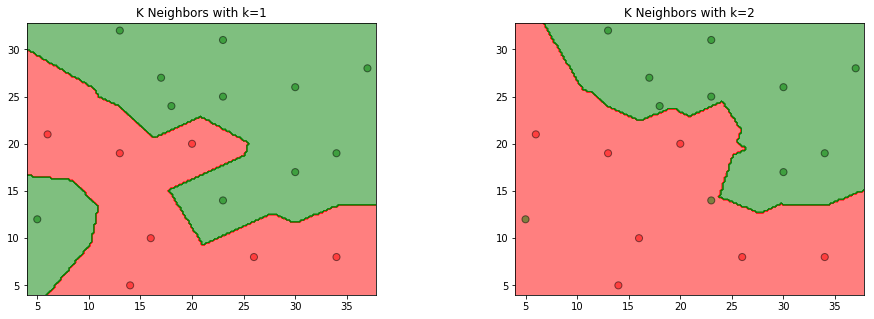

In [3]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

data = np.array([[5, 12, 1],
                [6, 21, 0],
                [14, 5, 0],
                [16, 10, 0],
                [13, 19, 0],
                [13, 32, 1],
                [17, 27, 1],
                [18, 24, 1],
                [20, 20, 0],
                [23, 14, 1],
                [23, 25, 1],
                [23, 31, 1],
                [26, 8, 0],
                [30, 17, 1],
                [30, 26, 1],
                [34, 8, 0],
                [34, 19, 1],
                [37, 28, 1]])
X_train = data[:, 0:2]
y_train = data[:, 2]

models = (KNeighborsClassifier(n_neighbors=1, n_jobs=-1),
          KNeighborsClassifier(n_neighbors=2, n_jobs=-1))
models = (clf.fit(X_train, y_train) for clf in models)

titles = ('K Neighbors with k=1',
          'K Neighbors with k=2')

fig = plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

for clf, title, ax in zip(models, titles, fig.subplots(1, 2).flatten()):    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')  
    cmap = ListedColormap(colors[:len(np.unique(Z))])  
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    
    ax.scatter(X0, X1, c=y_train, s=50, edgecolors='k', cmap=cmap, alpha=0.5)
    ax.set_title(title)

plt.show()

### 习题3.2
&emsp;&emsp;利用例题3.2构造的$kd$树求点$x=(3,4.5)^T$的最近邻点。

**解答：**

In [4]:
import numpy as np
from sklearn.neighbors import KDTree

train_data = np.array([(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)])
tree = KDTree(train_data, leaf_size=2)
dist, ind = tree.query(np.array([(3, 4.5)]), k=1)
x1 = train_data[ind[0]][0][0]
x2 = train_data[ind[0]][0][1]

print("x点的最近邻点是({0}, {1})".format(x1, x2))

x点的最近邻点是(2, 3)


### 习题3.3
&emsp;&emsp;参照算法3.3，写出输出为$x$的$k$近邻的算法。

**解答：**  
**算法：用kd树的$k$近邻搜索**  
输入：已构造的kd树；目标点$x$；    
输出：$x$的最近邻    
1. 在$kd$树中找出包含目标点$x$的叶结点：从根结点出发，递归地向下访问树。若目标点$x$当前维的坐标小于切分点的坐标，则移动到左子结点，否则移动到右子结点，直到子结点为叶结点为止；  
2. 如果“当前$k$近邻点集”元素数量小于$k$或者叶节点距离小于“当前$k$近邻点集”中最远点距离，那么将叶节点插入“当前k近邻点集”；  
3. 递归地向上回退，在每个结点进行以下操作：  
(a)如果“当前$k$近邻点集”元素数量小于$k$或者当前节点距离小于“当前$k$近邻点集”中最远点距离，那么将该节点插入“当前$k$近邻点集”。  
(b)检查另一子结点对应的区域是否与以目标点为球心、以目标点与于“当前$k$近邻点集”中最远点间的距离为半径的超球体相交。如果相交，可能在另一个子结点对应的区域内存在距目标点更近的点，移动到另一个子结点，接着，递归地进行最近邻搜索；如果不相交，向上回退；
4. 当回退到根结点时，搜索结束，最后的“当前$k$近邻点集”即为$x$的最近邻点。

In [5]:
# 构建kd树，搜索待预测点所属区域
from collections import namedtuple
import numpy as np


# 建立节点类
class Node(namedtuple("Node", "location left_child right_child")):
    def __repr__(self):
        return str(tuple(self))


# kd tree类
class KdTree():
    def __init__(self, k=1):
        self.k = k
        self.kdtree = None

    # 构建kd tree
    def _fit(self, X, depth=0):
        try:
            k = self.k
        except IndexError as e:
            return None
        # 这里可以展开，通过方差选择axis
        axis = depth % k
        X = X[X[:, axis].argsort()]
        median = X.shape[0] // 2
        try:
            X[median]
        except IndexError:
            return None
        return Node(
            location=X[median],
            left_child=self._fit(X[:median], depth + 1),
            right_child=self._fit(X[median + 1:], depth + 1)
        )

    def _search(self, point, tree=None, depth=0, best=None):
        if tree is None:
            return best
        k = self.k
        # 更新 branch
        if point[0][depth % k] < tree.location[depth % k]:
            next_branch = tree.left_child
        else:
            next_branch = tree.right_child
        if not next_branch is None:
            best = next_branch.location
        return self._search(point, tree=next_branch, depth=depth + 1, best=best)

    def fit(self, X):
        self.kdtree = self._fit(X)
        return self.kdtree

    def predict(self, X):
        res = self._search(X, self.kdtree)
        return res 

In [6]:
KNN = KdTree()
X_train = np.array([[2, 3],
                    [5, 4],
                    [9, 6],
                    [4, 7],
                    [8, 1],
                    [7, 2]])
KNN.fit(X_train)
X_new = np.array([[3, 4.5]])
res = KNN.predict(X_new)

x1 = res[0]
x2 = res[1]

print("x点的最近邻点是({0}, {1})".format(x1, x2))

x点的最近邻点是(2, 3)


## 第4章朴素贝叶斯法-习题

### 习题4.1
&emsp;&emsp;用极大似然估计法推出朴素贝叶斯法中的概率估计公式(4.8)及公式 (4.9)。

**解答：**  
**第1步：**证明公式(4.8)：$\displaystyle P(Y=c_k) = \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k)}{N}$  
由于朴素贝叶斯法假设$Y$是定义在输出空间$\mathcal{Y}$上的随机变量，因此可以定义$P(Y=c_k)$概率为$p$。  
令$\displaystyle m=\sum_{i=1}^NI(y_i=c_k)$，得出似然函数：$$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{N}{m}p^m(1-p)^{(N-m)}$$使用微分求极值，两边同时对$p$求微分：$$\begin{aligned}
0 &= \binom{N}{m}\left[mp^{(m-1)}(1-p)^{(N-m)}-(N-m)p^m(1-p)^{(N-m-1)}\right] \\
& = \binom{N}{m}\left[p^{(m-1)}(1-p)^{(N-m-1)}(m-Np)\right]
\end{aligned}$$可求解得到$\displaystyle p=0,p=1,p=\frac{m}{N}$  
显然$\displaystyle P(Y=c_k)=p=\frac{m}{N}=\frac{\displaystyle \sum_{i=1}^N I(y_i=c_k)}{N}$，公式(4.8)得证。

----

**第2步：**证明公式(4.9)：$\displaystyle P(X^{(j)}=a_{jl}|Y=c_k) = \frac{\displaystyle \sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k)}{\displaystyle \sum_{i=1}^N I(y_i=c_k)}$  
令$P(X^{(j)}=a_{jl}|Y=c_k)=p$，令$\displaystyle m=\sum_{i=1}^N I(y_i=c_k), q=\sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k)$，得出似然函数：$$L(p)=\binom{m}{q}p^q(i-p)^{m-q}$$使用微分求极值，两边同时对$p$求微分：$$\begin{aligned}
0 &= \binom{m}{q}\left[qp^{(q-1)}(1-p)^{(m-q)}-(m-q)p^q(1-p)^{(m-q-1)}\right] \\
& = \binom{m}{q}\left[p^{(q-1)}(1-p)^{(m-q-1)}(q-mp)\right]
\end{aligned}$$可求解得到$\displaystyle p=0,p=1,p=\frac{q}{m}$  
显然$\displaystyle P(X^{(j)}=a_{jl}|Y=c_k)=p=\frac{q}{m}=\frac{\displaystyle \sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k)}{\displaystyle \sum_{i=1}^N I(y_i=c_k)}$，公式(4.9)得证。

### 习题4.2
&emsp;&emsp;用贝叶斯估计法推出朴素贝叶斯法中的慨率估计公式(4.10)及公式(4.11)

**解答：**  
**第1步：**证明公式(4.11)：$\displaystyle P(Y=c_k) = \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k) + \lambda}{N+K \lambda}$  
加入先验概率，在没有任何信息的情况下，可以假设先验概率为均匀概率（即每个事件的概率是相同的）。  
可得$\displaystyle p=\frac{1}{K} \Leftrightarrow pK-1=0\quad(1)$  
根据习题4.1得出先验概率的极大似然估计是$\displaystyle pN - \sum_{i=1}^N I(y_i=c_k) = 0\quad(2)$  
存在参数$\lambda$使得$(1) \cdot \lambda + (2) = 0$  
所以有$$\lambda(pK-1) + pN - \sum_{i=1}^N I(y_i=c_k) = 0$$可得$\displaystyle P(Y=c_k) = \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k) + \lambda}{N+K \lambda}$，公式(4.11)得证。  

----

**第2步：**证明公式(4.10)：$\displaystyle P_{\lambda}(X^{(j)}=a_{jl} | Y = c_k) = \frac{\displaystyle \sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k) + \lambda}{\displaystyle \sum_{i=1}^N I(y_i=c_k) + S_j \lambda}$   
根据第1步，可同理得到$$
P(Y=c_k, x^{(j)}=a_{j l})=\frac{\displaystyle \sum_{i=1}^N I(y_i=c_k, x_i^{(j)}=a_{jl})+\lambda}{N+K S_j \lambda}$$  
$$\begin{aligned} 
P(x^{(j)}=a_{jl} | Y=c_k)
&= \frac{P(Y=c_k, x^{(j)}=a_{j l})}{P(y_i=c_k)} \\
&= \frac{\displaystyle \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k, x_i^{(j)}=a_{jl})+\lambda}{N+K S_j \lambda}}{\displaystyle \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k) + \lambda}{N+K \lambda}} \\
&= (\lambda可以任意取值，于是取\lambda = S_j \lambda) \\
&= \frac{\displaystyle \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k, x_i^{(j)}=a_{jl})+\lambda}{N+K S_j \lambda}}{\displaystyle \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k) + \lambda}{N+K S_j \lambda}} \\ 
&= \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k, x_i^{(j)}=a_{jl})+\lambda}{\displaystyle \sum_{i=1}^N I(y_i=c_k) + \lambda} (其中\lambda = S_j \lambda)\\
&= \frac{\displaystyle \sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k) + \lambda}{\displaystyle \sum_{i=1}^N I(y_i=c_k) + S_j \lambda}
\end{aligned} $$  
公式(4.11)得证。

## 第5章决策树-习题

### 习题5.1
根据表5.1所给的训练数据集，利用信息增益比（C4.5算法）生成决策树。

**解答：**  

表5.1 贷款申请样本数据表  

ID | 年龄 | 有工作 | 有自己的房子 | 信贷情况 | 类别
:-: | :-: | :-: | :-: | :-: | :-: 
1 | 青年 | 否 | 否 | 一般 | 否
2 | 青年 | 否 | 否 | 好 | 否
3 | 青年 | 是 | 否 | 好 | 是
4 | 青年 | 是 | 是 | 一般 | 是
5 | 青年 | 否 | 否 | 一般 | 否
6 | 中年 | 否 | 否 | 一般 | 否
7 | 中年 | 否 | 否 | 好 | 否
8 | 中年 | 是 | 是 | 好 | 是
9 | 中年 | 否 | 是 | 非常好 | 是
10 | 中年 | 否 | 是 | 非常好 | 是
11 | 老年 | 否 | 是 | 非常好 | 是
12 | 老年 | 否 | 是 | 好 | 是
13 | 老年 | 是 | 否 | 好 | 是
14 | 老年 | 是 | 否 | 非常好 | 是
15 | 老年 | 否 | 否 | 一般 | 否

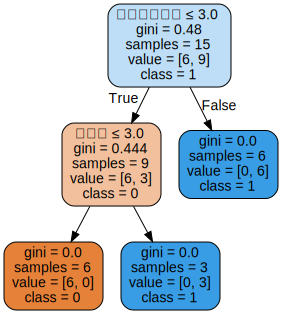

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import numpy as np
import pandas as pd

from sklearn import tree
import graphviz

features = ["年龄", "有工作", "有自己的房子", "信贷情况"]
X_train = pd.DataFrame([
    ["青年", "否", "否", "一般"],
    ["青年", "否", "否", "好"],
    ["青年", "是", "否", "好"],
    ["青年", "是", "是", "一般"],
    ["青年", "否", "否", "一般"],
    ["中年", "否", "否", "一般"],
    ["中年", "否", "否", "好"],
    ["中年", "是", "是", "好"],
    ["中年", "否", "是", "非常好"],
    ["中年", "否", "是", "非常好"],
    ["老年", "否", "是", "非常好"],
    ["老年", "否", "是", "好"],
    ["老年", "是", "否", "好"],
    ["老年", "是", "否", "非常好"],
    ["老年", "否", "否", "一般"]
])
y_train = pd.DataFrame(["否", "否", "是", "是", "否", "否", "否", "是", "是", "是", "是", "是", "是", "是", "否"])
# 数据预处理
le_x = preprocessing.LabelEncoder()
le_x.fit(np.unique(X_train))
X_train = X_train.apply(le_x.transform)
le_y = preprocessing.LabelEncoder()
le_y.fit(np.unique(y_train))
y_train = y_train.apply(le_y.transform)
# 调用sklearn.DT建立训练模型
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

# 可视化
dot_data = tree.export_graphviz(model_tree, out_file=None,
                                    feature_names=features,
                                    class_names=[str(k) for k in np.unique(y_train)],
                                    filled=True, rounded=True,
                                    special_characters=True)
graph = graphviz.Source(dot_data)
graph

### 习题5.2
&emsp;&emsp;已知如表5.2所示的训练数据，试用平方误差损失准则生成一个二叉回归树。  
表5.2 训练数据表  

| $x_i$ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |  
| - | - | - | - | - | - | - | - | - | - | - |  
| $y_i$ | 4.50 | 4.75 | 4.91 | 5.34 | 5.80 | 7.05 | 7.90 | 8.23 | 8.70 | 9.00

**解答：**  
&emsp;&emsp;决策树的生成就是递归地构建二叉决策树的过程，对回归树用平方误差最小化准则，对分类树用基尼指数（Gini index）最小化准则，进行特征选择，生成二叉树。  
> 算法5.5（最小二乘回归树生成算法）  
输入：训练数据集$D$  
输出：回归树$f(x)$  
在训练数据集所在的输入空间中，递归地将每个区域划分为两个子区域并决定每个子区域上的输出值，构建二叉决策树；  
(1)选择最优切分变量$j$与切分点$s$，求解$$\min_{j,s} \left[ \min_{c_1} \sum_{x_i \in R_1(j,s)} (y_i - c_1)^2 + \min_{c_2} \sum_{x_i \in R_2(j,s)} (y_i - c_2)^2\right]$$遍历变量$j$，对固定的切分变量$j$扫描切分点$s$，选择使得上式达到最小值的对$(j,s)$  
(2)用选定的对$(j,s)$划分区域并决定相应的输出值：$$R_1(j,s)=\{x|x^{(j)}\leqslant s\}, R_2(j,s)=\{x|x^{(j)} > s\} \\ 
\hat{c_m} = \frac{1}{N_m} \sum_{x_i \in R_m(j,s)} y_i, x \in R_m, m=1,2 $$
(3)继续对两个子区域调用步骤(1),(2)，直至满足停止条件  
(4)将输入空间划分为$M$个区域$R_1,R_2,\cdots,R_M$，生成决策树：$$f(x)=\sum_{m=1}^M \hat{c_m} I(x \in R_m)$$

In [8]:
import numpy as np


class LeastSqRTree:
    def __init__(self, train_X, y, epsilon):
        # 训练集特征值
        self.x = train_X
        # 类别
        self.y = y
        # 特征总数
        self.feature_count = train_X.shape[1]
        # 损失阈值
        self.epsilon = epsilon
        # 回归树
        self.tree = None

    def _fit(self, x, y, feature_count, epsilon):
        # 选择最优切分点变量j与切分点s
        (j, s, minval, c1, c2) = self._divide(x, y, feature_count)
        # 初始化树
        tree = {"feature": j, "value": x[s, j], "left": None, "right": None}
        if minval < self.epsilon or len(y[np.where(x[:, j] <= x[s, j])]) <= 1:
            tree["left"] = c1
        else:
            tree["left"] = self._fit(x[np.where(x[:, j] <= x[s, j])], y[np.where(x[:, j] <= x[s, j])],
                                     self.feature_count,
                                     self.epsilon)
        if minval < self.epsilon or len(y[np.where(x[:, j] > s)]) <= 1:
            tree["right"] = c2
        else:
            tree["right"] = self._fit(x[np.where(x[:, j] > x[s, j])], y[np.where(x[:, j] > x[s, j])],
                                      self.feature_count,
                                      self.epsilon)
        return tree

    def fit(self):
        self.tree = self._fit(self.x, self.y, self.feature_count, self.epsilon)

    @staticmethod
    def _divide(x, y, feature_count):
        # 初始化损失误差
        cost = np.zeros((feature_count, len(x)))
        # 公式5.21
        for i in range(feature_count):
            for k in range(len(x)):
                # k行i列的特征值
                value = x[k, i]
                y1 = y[np.where(x[:, i] <= value)]
                c1 = np.mean(y1)
                y2 = y[np.where(x[:, i] > value)]
                c2 = np.mean(y2)
                y1[:] = y1[:] - c1
                y2[:] = y2[:] - c2
                cost[i, k] = np.sum(y1 * y1) + np.sum(y2 * y2)
        # 选取最优损失误差点
        cost_index = np.where(cost == np.min(cost))
        # 选取第几个特征值
        j = cost_index[0][0]
        # 选取特征值的切分点
        s = cost_index[1][0]
        # 求两个区域的均值c1,c2
        c1 = np.mean(y[np.where(x[:, j] <= x[s, j])])
        c2 = np.mean(y[np.where(x[:, j] > x[s, j])])
        return j, s, cost[cost_index], c1, c2

In [9]:
train_X = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]).T
y = np.array([4.50, 4.75, 4.91, 5.34, 5.80, 7.05, 7.90, 8.23, 8.70, 9.00])

model_tree = LeastSqRTree(train_X, y, .2)
model_tree.fit()
model_tree.tree

C:\Users\Hurf\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Hurf\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'feature': 0,
 'left': {'feature': 0, 'left': 4.72, 'right': 5.57, 'value': 3},
 'right': {'feature': 0,
  'left': {'feature': 0, 'left': 7.05, 'right': 7.9, 'value': 6},
  'right': {'feature': 0, 'left': 8.23, 'right': 8.85, 'value': 8},
  'value': 7},
 'value': 5}

根据上面程序的输出，可得到用平方误差损失准则生成一个二叉回归树：$$f(x)=\begin{cases}
4.72 & x \le 3\\
5.57 & 3 < x \le 5\\
7.05 & 5 < x \le 6\\
7.9 & 6 < x \le 7 \\
8.23 & 7 < x \le 8\\
8.85 & x > 8\\
\end{cases}$$

### 习题5.3

&emsp;&emsp;证明 CART 剪枝算法中，当$\alpha$确定时，存在唯一的最小子树$T_{\alpha}$使损失函数$C_{\alpha}(T)$最小。

**解答：**  
**第1步：**内部节点是否剪枝只与以该节点为根节点的子树有关。  
剪枝过程：  
计算子树的损失函数：$$C_{\alpha}(T)=C(T)+\alpha$$其中，$\displaystyle C(T) = \sum_{t=1}^{|T|}N_t (1 - \sum_{k=1}^K (\frac{N_{tk}}{N_t})^2)$，$|T|$是叶结点个数，$K$是类别个数。  
有剪枝前子树$T_0$，剪枝后子树$T_1$，满足$C_{\alpha}(T_1) \leqslant C_{\alpha}(T_0)$则进行剪枝。 

----

**第2步（反证法）：**假设当$\alpha$确定时，存在两颗子树$T_1,T_2$都使得损失函数$C_{\alpha}$最小。  
第1种情况：假设被剪枝的子树在同一边，易知其中一个子树会由另一个子树剪枝而得到，故不可能存在两个最优子树，原结论得证。  
第2种情况：假设被剪枝的子树不在同一边，易知被剪枝掉的子树都可以使损失函数$C_{\alpha}$最小，故两颗子树都可以继续剪枝，故不可能存在两个最优子树，原结论得证。

### 习题5.4

&emsp;&emsp;证明 CART 剪枝算法中求出的子树序列$\{T_0,T_1,\cdots,T_n\}$分别是区间$\alpha \in [\alpha_i,\alpha_{i+1})$的最优子树$T_{\alpha}$，这里$i=0,1,\cdots,n,0=\alpha_0 < \alpha_1 < \cdots, \alpha_n < +\infty$。

**解答：**  
原结论可以表述为：将$\alpha$从小增大，$0=\alpha_0<\alpha_1<\cdots<\alpha_n < +\infty$，在每个区间$[\alpha_i,\alpha_{i+1})$中，子树$T_i$是这个区间里最优的。  
**第1步：**易证，当$\alpha=0$时，整棵树$T_0$是最优的，当$\alpha \rightarrow +\infty$时，根结点组成的单结点树（即$T_n$）是最优的。

----

**第2步：**  
&emsp;&emsp;由于每次剪枝剪的都是某个内部结点的子结点，也就是将某个内部结点的所有子结点回退到这个内部结点里，并将这个内部结点作为叶子结点。因此在计算整体的损失函数时，这个内部结点以外的值都没变，只有这个内部结点的局部损失函数改变了，因此本来需要计算全局的损失函数，但现在只需要计算内部结点剪枝前和剪枝后的损失函数。  
从整体树$T_0$开始剪枝，对$T_0$的任意内部结点$t$    
剪枝前的状态：有$|T_t|$个叶子结点，预测误差是$C(T_t)$  
剪枝后的状态：只有本身一个叶子结点，预测误差是$C(t)$
因此剪枝前的以$t$结点为根结点的子树的损失函数是$$C_{\alpha}(T_t) = C(T_t) + \alpha|T_t|$$剪枝后的损失函数是$$C_{\alpha}(t) = C(t) + \alpha$$易得，一定存在一个$\alpha$使得$C_{\alpha}(T_t) = C_{\alpha}(t)$，这个值为$$\alpha=\frac{C(t)-C(T_t)}{|T_t|-1}$$可知，找到$\alpha$即找到了子结点$t$，即完成了剪枝，得到最优子树$T_1$  
根据书中第73页，采用以下公式计算剪枝后整体损失函数减少的程度：$$g(t)=\frac{C(t)-C(T_t)}{|T_t|-1}$$在$T_0$中剪去$g(t)$最小的$T_t$，将得到的子树作为$T_1$，同时将最小的$g(t)$设为$\alpha_1$，$T_1$为区间$[\alpha_1,\alpha_2)$的最优子树。  
依次类推，子树$T_i$是区间$[\alpha_i,\alpha_{i+1})$里最优的，原结论得证。

----

**参考文献：**  
1. MrTriste：https://blog.csdn.net/wjc1182511338/article/details/76793164
2. http://www.pianshen.com/article/1752163397/

----

**讨论：**为什么$\alpha$要取最小的$g(t)$呢？  
<br/><center>
<img style="border-radius: 0.3125em;box-shadow: 0 2px 4px 0 rgba(34,36,38,.12),0 2px 10px 0 rgba(34,36,38,.08);" src="../images/5-1-min-g(t).png"><br><div style="color:orange; border-bottom: 1px solid #d9d9d9;display: inline-block;color: #000;padding: 2px;">图5.1 最小的$g(t)$</div></center>  
&emsp;&emsp;以图中两个点为例，结点1和结点2，$g(t)_2$大于$g(t)_1$，假设在所有结点中$g(t)_1$最小，$g(t)_2$最大，两种选择方法：当选择最大值$g(t)_2$，即结点2进行剪枝，但此时结点1的剪枝前的误差大于剪枝后的误差，即如果不剪枝，误差变大，依次类推，对其它所有的结点的$g(t)$都是如此，从而造成整体的累计误差更大。反之，如果选择最小值$g(t)_1$，即结点1进行剪枝，则其余结点不剪的误差要小于剪枝后的误差，不剪枝为好，且整体的误差最小。从而以最小$g(t)$剪枝获得的子树是该$\alpha$值下的最优子树。

## 第6章Logistic回归与最大熵模型-习题

### 习题6.1
&emsp;&emsp;确认Logistic分布属于指数分布族。

**解答：**  
**第1步：**  
首先给出指数分布族的定义：  
对于随机变量$x$，在给定参数$\eta$下，其概率分别满足如下形式：$$p(x|\eta)=h(x)g(\eta)\exp(\eta^Tu(x))$$我们称之为**指数分布族**。  
其中：  
$x$：可以是标量或者向量，可以是离散值也可以是连续值  
$\eta$：自然参数  
$g(\eta)$：归一化系数  
$h(x),u(x)$：$x$的某个函数  

----

**第2步：**证明伯努利分布属于指数分布族  
伯努利分布：$\varphi$是$y=1$的概率，即$P(Y=1)=\varphi$  
$\begin{aligned}
P(y|\varphi) 
&= \varphi^y (1-\varphi)^{(1-y)} \\
&= (1-\varphi) \varphi^y (1-\varphi)^{(-y)} \\
&= (1-\varphi) (\frac{\varphi}{1-\varphi})^y \\
&= (1-\varphi) \exp\left(y \ln \frac{\varphi}{1-\varphi} \right) \\
&= \frac{1}{1+e^\eta} \exp (\eta y)
\end{aligned}$  
其中，$\displaystyle \eta=\ln \frac{\varphi}{1-\varphi} \Leftrightarrow \varphi = \frac{1}{1+e^{-\eta}}$  
将$y$替换成$x$，可得$\displaystyle P(x|\eta) = \frac{1}{1+e^\eta} \exp (\eta x)$
对比可知，伯努利分布属于指数分布族，其中$\displaystyle h(x) = 1, g(\eta)= \frac{1}{1+e^\eta}, u(x)=x$  

----

**第3步：**  
广义线性模型（GLM）必须满足三个假设：
1. $y | x;\theta \sim ExponentialFamily(\eta)$，即假设预测变量$y$在给定$x$，以$\theta$为参数的条件概率下，属于以$\eta$作为自然参数的指数分布族；  
2. 给定$x$，求解出以$x$为条件的$T(y)$的期望$E[T(y)|x]$，即算法输出为$h(x)=E[T(y)|x]$  
3. 满足$\eta=\theta^T x$，即自然参数和输入特征向量$x$之间线性相关，关系由$\theta$决定，仅当$\eta$是实数时才有意义，若$\eta$是一个向量，则$\eta_i=\theta_i^T x$

----

**第4步：**推导伯努利分布的GLM  
已知伯努利分布属于指数分布族，对给定的$x,\eta$，求解期望：$$\begin{aligned}
h_{\theta}(x) 
&= E[y|x;\theta] \\
&= 1 \cdot p(y=1)+ 0 \cdot p(y=0) \\
&= \varphi \\
&= \frac{1}{1+e^{-\eta}} \\
&= \frac{1}{1+e^{-\theta^T x}}
\end{aligned}$$可得到Logistic回归算法，故Logistic分布属于指数分布族，得证。

### 习题6.2
&emsp;&emsp;写出Logistic回归模型学习的梯度下降算法。

**解答：**  
对于Logistic模型：$$P(Y=1 | x)=\frac{\exp (w \cdot x+b)}{1+\exp (w \cdot x+b)} \\ P(Y=0 | x)=\frac{1}{1+\exp (w \cdot x+b)}
$$对数似然函数为：$\displaystyle L(w)=\sum_{i=1}^N \left[y_i (w \cdot x_i)-\log \left(1+\exp (w \cdot x_i)\right)\right]$  
似然函数求偏导，可得$\displaystyle \frac{\partial L(w)}{\partial w^{(j)}}=\sum_{i=1}^N\left[x_i^{(j)} \cdot y_i-\frac{\exp (w \cdot x_i) \cdot x_i^{(j)}}{1+\exp (w \cdot x_i)}\right]$  
梯度函数为：$\displaystyle \nabla L(w)=\left[\frac{\partial L(w)}{\partial w^{(0)}}, \cdots, \frac{\partial L(w)}{\partial w^{(m)}}\right]$  
Logistic回归模型学习的梯度下降算法：  
(1) 取初始值$x^{(0)} \in R$，置$k=0$  
(2) 计算$f(x^{(k)})$  
(3) 计算梯度$g_k=g(x^{(k)})$，当$\|g_k\| < \varepsilon$时，停止迭代，令$x^* = x^{(k)}$；否则，求$\lambda_k$，使得$\displaystyle f(x^{(k)}+\lambda_k g_k) = \max_{\lambda \geqslant 0}f(x^{(k)}+\lambda g_k)$  
(4) 置$x^{(k+1)}=x^{(k)}+\lambda_k g_k$，计算$f(x^{(k+1)})$，当$\|f(x^{(k+1)}) - f(x^{(k)})\| < \varepsilon$或 $\|x^{(k+1)} - x^{(k)}\| < \varepsilon$时，停止迭代，令$x^* = x^{(k+1)}$  
(5) 否则，置$k=k+1$，转(3)

In [10]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import mpl

# 图像显示中文
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']

class LogisticRegression:
    def __init__(self, learn_rate=0.1, max_iter=10000, tol=1e-2):
        self.learn_rate = learn_rate  # 学习率
        self.max_iter = max_iter  # 迭代次数
        self.tol = tol  # 迭代停止阈值
        self.w = None  # 权重

    def preprocessing(self, X):
        """将原始X末尾加上一列，该列数值全部为1"""
        row = X.shape[0]
        y = np.ones(row).reshape(row, 1)
        X_prepro = np.hstack((X, y))
        return X_prepro

    def sigmod(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X_train, y_train):
        X = self.preprocessing(X_train)
        y = y_train.T
        # 初始化权重w
        self.w = np.array([[0] * X.shape[1]], dtype=np.float)
        k = 0
        for loop in range(self.max_iter):
            # 计算梯度
            z = np.dot(X, self.w.T)
            grad = X * (y - self.sigmod(z))
            grad = grad.sum(axis=0)
            # 利用梯度的绝对值作为迭代中止的条件
            if (np.abs(grad) <= self.tol).all():
                break
            else:
                # 更新权重w 梯度上升——求极大值
                self.w += self.learn_rate * grad
                k += 1
        print("迭代次数：{}次".format(k))
        print("最终梯度：{}".format(grad))
        print("最终权重：{}".format(self.w[0]))

    def predict(self, x):
        p = self.sigmod(np.dot(self.preprocessing(x), self.w.T))
        print("Y=1的概率被估计为：{:.2%}".format(p[0][0]))  # 调用score时，注释掉
        p[np.where(p > 0.5)] = 1
        p[np.where(p < 0.5)] = 0
        return p

    def score(self, X, y):
        y_c = self.predict(X)
        error_rate = np.sum(np.abs(y_c - y.T)) / y_c.shape[0]
        return 1 - error_rate

    def draw(self, X, y):
        # 分离正负实例点
        y = y[0]
        X_po = X[np.where(y == 1)]
        X_ne = X[np.where(y == 0)]
        # 绘制数据集散点图
        ax = plt.axes(projection='3d')
        x_1 = X_po[0, :]
        y_1 = X_po[1, :]
        z_1 = X_po[2, :]
        x_2 = X_ne[0, :]
        y_2 = X_ne[1, :]
        z_2 = X_ne[2, :]
        ax.scatter(x_1, y_1, z_1, c="r", label="正实例")
        ax.scatter(x_2, y_2, z_2, c="b", label="负实例")
        ax.legend(loc='best')
        # 绘制p=0.5的区分平面
        x = np.linspace(-3, 3, 3)
        y = np.linspace(-3, 3, 3)
        x_3, y_3 = np.meshgrid(x, y)
        a, b, c, d = self.w[0]
        z_3 = -(a * x_3 + b * y_3 + d) / c
        ax.plot_surface(x_3, y_3, z_3, alpha=0.5)  # 调节透明度
        plt.show()

迭代次数：3232次
最终梯度：[ 0.00144779  0.00046133  0.00490279 -0.00999848]
最终权重：[  2.96908597   1.60115396   5.04477438 -13.43744079]


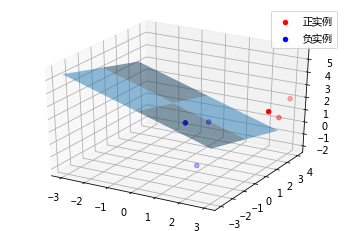

In [11]:
# 训练数据集
X_train = np.array([[3, 3, 3], [4, 3, 2], [2, 1, 2], [1, 1, 1], [-1, 0, 1], [2, -2, 1]])
y_train = np.array([[1, 1, 1, 0, 0, 0]])
# 构建实例，进行训练
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.draw(X_train, y_train)

### 习题6.3
&emsp;&emsp;写出最大熵模型学习的DFP算法。（关于一般的DFP算法参见附录B）

**解答：**  
**第1步：**  
最大熵模型为：$$
\begin{array}{cl}
{\max } & {H(p)=-\sum_{x, y} P(x) P(y | x) \log P(y | x)} \\ 
{\text {st.}} &
{E_p(f_i)-E_{\hat{p}}(f_i)=0, \quad i=1,2, \cdots,n} \\ 
& {\sum_y P(y | x)=1}
\end{array}$$引入拉格朗日乘子，定义拉格朗日函数：$$
L(P, w)=\sum_{xy} P(x) P(y | x) \log P(y | x)+w_0 \left(1-\sum_y P(y | x)\right) +\sum_{i=1} w_i\left(\sum_{xy} P(x, y) f_i(x, y)-\sum_{xy} P(x, y) P(y | x) f_i(x, y)\right)$$最优化原始问题为：$$\min_{P \in C} \max_{w} L(P,w)$$对偶问题为：$$\max_{w} \min_{P \in C} L(P,w)$$令$$\Psi(w) = \min_{P \in C} L(P,w) = L(P_w, w)$$$\Psi(w)$称为对偶函数，同时，其解记作$$P_w = \mathop{\arg \min}_{P \in C} L(P,w) = P_w(y|x)$$求$L(P,w)$对$P(y|x)$的偏导数，并令偏导数等于0，解得：$$P_w(y | x)=\frac{1}{Z_w(x)} \exp \left(\sum_{i=1}^n w_i f_i (x, y)\right)$$其中：$$Z_w(x)=\sum_y \exp \left(\sum_{i=1}^n w_i f_i(x, y)\right)$$则最大熵模型目标函数表示为$$\varphi(w)=\min_{w \in R_n} \Psi(w) = \sum_{x} P(x) \log \sum_{y} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)-\sum_{x, y} P(x, y) \sum_{i=1}^{n} w_{i} f_{i}(x, y)$$  

----

**第2步：**  
DFP的$G_{k+1}$的迭代公式为：$$G_{k+1}=G_k+\frac{\delta_k \delta_k^T}{\delta_k^T y_k}-\frac{G_k y_k y_k^T G_k}{y_k^T G_k y_k}$$  
**最大熵模型的DFP算法：**   
输入：目标函数$\varphi(w)$，梯度$g(w) = \nabla g(w)$，精度要求$\varepsilon$；  
输出：$\varphi(w)$的极小值点$w^*$  
(1)选定初始点$w^{(0)}$，取$G_0$为正定对称矩阵，置$k=0$  
(2)计算$g_k=g(w^{(k)})$，若$\|g_k\| < \varepsilon$，则停止计算，得近似解$w^*=w^{(k)}$，否则转(3)  
(3)置$p_k=-G_kg_k$  
(4)一维搜索：求$\lambda_k$使得$$\varphi\left(w^{(k)}+\lambda_k P_k\right)=\min _{\lambda \geqslant 0} \varphi\left(w^{(k)}+\lambda P_{k}\right)$$(5)置$w^{(k+1)}=w^{(k)}+\lambda_k p_k$  
(6)计算$g_{k+1}=g(w^{(k+1)})$，若$\|g_{k+1}\| < \varepsilon$，则停止计算，得近似解$w^*=w^{(k+1)}$；否则，按照迭代式算出$G_{k+1}$  
(7)置$k=k+1$，转(3)  

## 第7章支持向量机-习题

### 习题7.1
&emsp;&emsp;比较感知机的对偶形式与线性可分支持向景机的对偶形式。

**解答：**  
**感知机算法的原始形式：**  
给定一个训练数据集$$T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$$其中，$x_i \in \mathcal{X} = R^n, y_i \in \mathcal{Y}=\{-1,1\}, i=1,2,\cdots,N$，求参数$w,b$，使其为以下损失函数极小化问题的解：$$\min_{w,b} L(w,b)=-\sum_{x_i \in M} y_i(w \cdot x_i + b)$$其中M为误分类点的集合。  
上式等价于：$$\min_{w,b} L(w,b)=\sum_{i=1}^N (-y_i(w \cdot x_i + b))_+$$

----

**补充：** 合页损失函数$$L(y(w \cdot x + b)) = [1-y(w \cdot x + b)]_+$$下标“+”表示以下取正数的函数。$$[z]_+ = \left\{\begin{array}{ll} z, & z>0 \\
0, & z \leqslant 0 
\end{array} \right.$$当样本点$(x_i,y_i)$被正确分类且函数间隔（确信度）$y_i(w \cdot x_i + b)$大于1时，损失是0，否则损失是$1-y_i(w \cdot x_i + b)$。

----

**感知机算法的对偶形式：**  
$w,b$表示为$\langle x_i,y_i \rangle$的线性组合的形式，求其系数（线性组合的系数）$\displaystyle w=\sum_{i=1}^N \alpha_i y_i x_i, b=\sum_{i=1}^N \alpha_i y_i$，满足：$$
\min_{w,b} L(w,b) = \min_{\alpha_i} L(\alpha_i) = \sum_{i=1}^N (-y_i (\sum_{j=1}^N \alpha_j y_j x_j \cdot x_i + \sum_{j=1}^N \alpha_j y_j))_+$$  

**线性可分支持向量机的原始问题：**  
$$\begin{array}{cl} 
\displaystyle \min_{w,b} & \displaystyle \frac{1}{2} \|w\|^2 \\
\text{s.t.} & y_i(w \cdot x_i + b) -1 \geqslant 0, i=1,2,\cdots,N
\end{array}$$  

**线性可分支持向量机的对偶问题：**  
$$\begin{array}{cl} 
\displaystyle \max_{\alpha} & \displaystyle -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1}^N 
alpha_i \\
\text{s.t.} & \displaystyle \sum_{i=1}^N \alpha_i y+i = 0 \\
& \alpha \geqslant 0, i=1,2,\cdots,N
\end{array}$$根据书上**定理7.2**，可得$\displaystyle w^*=\sum_{i=1}^N \alpha_i^* y_j x_i, b^*=y_i-\sum_{i=1}^N \alpha^* y_i (x_i \cdot x_j)$，可以看出$w,b$实质上也是将其表示为$\langle x_i, x_j\rangle$的线性组合形式。

### 习题7.2

&emsp;&emsp;已知正例点$x_1=(1,2)^T,x_2=(2,3)^T,x_3=(3,3)^T$，负例点$x_4=(2,1)^T,x_5=(3,2)^T$，试求最大间隔分离平面和分类决策函数，并在图中挂出分离超平面、间隔边界及支持向量。  

**解答：**

In [12]:
from sklearn.svm import SVC

# 加载数据
X = [[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]]
y = [1, 1, 1, -1, -1]

# 训练SVM模型
clf = SVC(kernel='linear', C=10000)
clf.fit(X, y)

print("w =", clf.coef_)
print("b =", clf.intercept_)
print("support vectors =", clf.support_vectors_)

w = [[-1.  2.]]
b = [-2.]
support vectors = [[3. 2.]
 [1. 2.]
 [3. 3.]]


**最大间隔分离超平面：**$-x^{(1)}+2x^{(2)}-2=0$  
**分类决策函数：**$f(x)=\text{sign}(-x^{(1)}+2x^{(2)}-2)$  
**支持向量：**$x_1=(3,2)^T,x_2=(1,2)^T, x_3=(3,3)^T$  

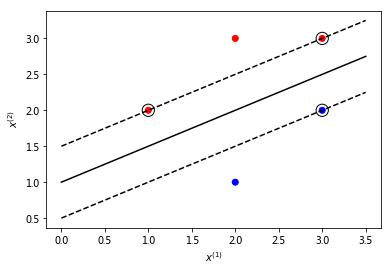

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制数据点
color_seq = ['red' if v==1 else 'blue' for v in y]
plt.scatter([i[0] for i in X], [i[1] for i in X], c=color_seq)
# 得到x轴的所有点
xaxis = np.linspace(0, 3.5)
w = clf.coef_[0]
# 计算斜率
a = -w[0] / w[1]
# 得到分离超平面
y_sep = a * xaxis - (clf.intercept_[0]) / w[1]
# 下边界超平面
b = clf.support_vectors_[0]
yy_down = a * xaxis + (b[1] - a * b[0])
# 上边界超平面
b = clf.support_vectors_[-1]
yy_up = a * xaxis + (b[1] - a * b[0])
# 绘制超平面
plt.plot(xaxis, y_sep, 'k-')
plt.plot(xaxis, yy_down, 'k--')
plt.plot(xaxis, yy_up, 'k--')
# 绘制支持向量
plt.xlabel('$x^{(1)}$')
plt.ylabel('$x^{(2)}$')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='k')
plt.show()

### 习题7.3

&emsp;&emsp;线性支持向量机还可以定义为以下形式：$$\begin{array}{cl} 
\displaystyle \min_{w,b,\xi} & \displaystyle \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i^2 \\
\text{s.t.} & y_i(w \cdot x_i + b) \geqslant 1 - \xi_i, i=1,2,\cdots, N \\
& \xi_i \geqslant 0, i=1,2,\cdots, N
\end{array}$$试求其对偶形式。

**解答：**  
根据支持向量机的对偶算法，得到对偶形式，由于不能消去变量$\xi_i$的部分，所以拉格朗日因子也包含$\beta_i$。  
拉格朗日函数为：$$L(w,b,\xi, \alpha, \beta) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i^2 + \sum_{i=1}^N \alpha_i - \sum_{i=1}^N \alpha_i \xi_i - \sum_{i=1}^N \alpha_i y_i (w \cdot x_i + b) - \sum_{i=1}^N \beta_i \xi_i$$  
分别求$w,b,\xi$的偏导数：$$\left \{ \begin{array}{l}
\displaystyle \nabla_w L  = w - \sum_{i=1}^N \alpha_i y_i x_i = 0 \\ 
\displaystyle \nabla_b L  =  -\sum_{i=1}^N \alpha_i y_i = 0 \\
\nabla_{\xi} L  = 2C \xi_i - \alpha_i - \beta_i = 0 
\end{array} \right.$$化简可得：$$\left \{ \begin{array}{l}
\displaystyle w = \sum_{i=1}^N \alpha_i y_i x_i = 0 \\ 
\displaystyle \sum_{i=1}^N \alpha_i y_i = 0 \\
2C \xi_i - \alpha_i - \beta_i = 0 
\end{array} \right.$$  
可解得：$$
L=-\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_{j})+\sum_{i=1}^N \alpha_i-\frac{1}{4C}\sum_{i=1}^N(\alpha_i+\beta_i)^2$$

### 习题7.4

&emsp;&emsp;证明内积的正整数幂函数：$$K(x,z)=(x\cdot z)^p$$是正定核函数，这里$p$是正整数，$ x,z\in R^n$。

**解答：**  
根据书中第121页定理7.5可知，如果需要证明$K(x,z)$是正定核函数，即证明$K(x,z)$对应的Gram矩阵$K=\left[ K(x_i,x_j) \right]_{m \times m}$是半正定矩阵。  
对任意$c_1,c_2,\cdots,c_m \in \mathbf{R}$，有$$\begin{aligned} 
\sum_{i,j=1}^m c_i c_j K(x_i,x_j) 
&= \sum_{i,j=1}^m c_i c_j (x_i \cdot x_j)^p \\
&= \left(\sum_{i=1}^m c_i x_i \right)\left(\sum_{j=1}^m c_i x_j \right)(x_i \cdot x_j)^{p-1} \\
&= \Bigg\|\left( \sum_{i=1}^m c_i x_i \right)\Bigg\|^2 (x_i \cdot x_j)^{p-1}
\end{aligned}$$
$\because p$是正整数，$p \geqslant 1$  
$\therefore p-1 \geqslant 0 \Rightarrow (x_i \cdot x_j)^{p-1} \geqslant 0$  
故$\displaystyle \sum_{i,j=1}^m c_i c_j K(x_i,x_j) \geqslant 0$，即Gram矩阵是半正定矩阵。  
根据定理7.5，可得$K(x,z)$是正定核函数，得证。

## 第8章提升方法-习题

### 习题8.1
&emsp;&emsp;某公司招聘职员考查身体、业务能力、发展潜力这3项。身体分为合格1、不合格0两级，业务能力和发展潜力分为上1、中2、下3三级分类为合格1 、不合格-1两类。已知10个人的数据，如下表所示。假设弱分类器为决策树桩。试用AdaBoost算法学习一个强分类器。  

应聘人员情况数据表

&emsp;&emsp;|1|2|3|4|5|6|7|8|9|10
-|-|-|-|-|-|-|-|-|-|-
身体|0|0|1|1|1|0|1|1|1|0
业务|1|3|2|1|2|1|1|1|3|2
潜力|3|1|2|3|3|2|2|1|1|1
分类|-1|-1|-1|-1|-1|-1|1|1|-1|-1

In [14]:
import numpy as np

# 加载训练数据
X = np.array([[0, 1, 3],
              [0, 3, 1],
              [1, 2, 2],
              [1, 1, 3],
              [1, 2, 3],
              [0, 1, 2],
              [1, 1, 2],
              [1, 1, 1],
              [1, 3, 1],
              [0, 2, 1]
              ])
y = np.array([-1, -1, -1, -1, -1, -1, 1, 1, -1, -1])

**AdaBoostClassifier分类器实现：**

采用sklearn的AdaBoostClassifier分类器直接求解，由于AdaBoostClassifier分类器默认采用CART决策树弱分类器，故不需要设置base_estimator参数。

In [15]:
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier()
clf.fit(X, y)
y_predict = clf.predict(X)
score = clf.score(X, y)
print("原始输出:", y)
print("预测输出:", y_predict)
print("预测正确率：{:.2%}".format(score))

原始输出: [-1 -1 -1 -1 -1 -1  1  1 -1 -1]
预测输出: [-1 -1 -1 -1 -1 -1  1  1 -1 -1]
预测正确率：100.00%


**自编程实现：**

In [16]:
# 自编程求解例8.1
import numpy as np


class AdaBoost:
    def __init__(self, X, y, tol=0.05, max_iter=10):
        # 训练数据 实例
        self.X = X
        # 训练数据 标签
        self.y = y
        # 训练中止条件 right_rate>self.tol
        self.tol = tol
        # 最大迭代次数
        self.max_iter = max_iter
        # 初始化样本权重w
        self.w = np.full((X.shape[0]), 1 / X.shape[0])
        self.G = []  # 弱分类器

    def build_stump(self):
        """
        以带权重的分类误差最小为目标，选择最佳分类阈值
        best_stump['dim'] 合适的特征所在维度
        best_stump['thresh']  合适特征的阈值
        best_stump['ineq']  树桩分类的标识lt,rt
        """
        m, n = np.shape(self.X)
        # 分类误差
        e_min = np.inf
        # 小于分类阈值的样本属于的标签类别
        sign = None
        # 最优分类树桩
        best_stump = {}
        for i in range(n):
            range_min = self.X[:, i].min()  # 求每一种特征的最大最小值
            range_max = self.X[:, i].max()
            step_size = (range_max - range_min) / n
            for j in range(-1, int(n) + 1):
                thresh_val = range_min + j * step_size
                # 计算左子树和右子树的误差
                for inequal in ['lt', 'rt']:
                    predict_vals = self.base_estimator(self.X, i, thresh_val, inequal)
                    err_arr = np.array(np.ones(m))
                    err_arr[predict_vals.T == self.y.T] = 0
                    weighted_error = np.dot(self.w, err_arr)
                    if weighted_error < e_min:
                        e_min = weighted_error
                        sign = predict_vals
                        best_stump['dim'] = i
                        best_stump['thresh'] = thresh_val
                        best_stump['ineq'] = inequal
        return best_stump, sign, e_min

    def updata_w(self, alpha, predict):
        """
        更新样本权重w
        """
        # 以下2行根据公式8.4 8.5 更新样本权重
        P = self.w * np.exp(-alpha * self.y * predict)
        self.w = P / P.sum()

    @staticmethod
    def base_estimator(X, dimen, threshVal, threshIneq):
        """
        计算单个弱分类器（决策树桩）预测输出
        """
        ret_array = np.ones(np.shape(X)[0])  # 预测矩阵
        # 左叶子 ，整个矩阵的样本进行比较赋值
        if threshIneq == 'lt':
            ret_array[X[:, dimen] <= threshVal] = -1.0
        else:
            ret_array[X[:, dimen] > threshVal] = -1.0
        return ret_array

    def fit(self):
        """
        对训练数据进行学习
        """
        G = 0
        for i in range(self.max_iter):
            best_stump, sign, error = self.build_stump()  # 获取当前迭代最佳分类阈值
            alpha = 1 / 2 * np.log((1 - error) / error)  # 计算本轮弱分类器的系数
            # 弱分类器权重
            best_stump['alpha'] = alpha
            # 保存弱分类器
            self.G.append(best_stump)
            # 以下3行计算当前总分类器（之前所有弱分类器加权和）分类效率
            G += alpha * sign
            y_predict = np.sign(G)
            error_rate = np.sum(np.abs(y_predict - self.y)) / 2 / self.y.shape[0]
            if error_rate < self.tol:  # 满足中止条件 则跳出循环
                print("迭代次数:", i + 1)
                break
            else:
                self.updata_w(alpha, y_predict)  # 若不满足，更新权重，继续迭代

    def predict(self, X):
        """
        对新数据进行预测
        """
        m = np.shape(X)[0]
        G = np.zeros(m)
        for i in range(len(self.G)):
            stump = self.G[i]
            # 遍历每一个弱分类器，进行加权
            _G = self.base_estimator(X, stump['dim'], stump['thresh'], stump['ineq'])
            alpha = stump['alpha']
            G += alpha * _G
        y_predict = np.sign(G)
        return y_predict.astype(int)

    def score(self, X, y):
        """对训练效果进行评价"""
        y_predict = self.predict(X)
        error_rate = np.sum(np.abs(y_predict - y)) / 2 / y.shape[0]
        return 1 - error_rate

In [17]:
clf = AdaBoost(X, y)
clf.fit()
y_predict = clf.predict(X)
score = clf.score(X, y)
print("原始输出:", y)
print("预测输出:", y_predict)
print("预测正确率：{:.2%}".format(score))

迭代次数: 8
原始输出: [-1 -1 -1 -1 -1 -1  1  1 -1 -1]
预测输出: [-1 -1 -1 -1 -1 -1  1  1 -1 -1]
预测正确率：100.00%


### 习题8.2
&emsp;&emsp;比较支持向量机、 AdaBoost 、Logistic回归模型的学习策略与算法

**解答：**  
- **支持向量机**  
学习策略：极小化正则化合页损失，软间隔最大化；  
学习算法：序列最小最优化算法（SMO）  
- **AdaBoost**  
学习策略：极小化加法模型指数损失；  
学习算法：前向分步加法算法  
- **Logistic回归**  
学习策略：极大似然估计，正则化的极大似然估计；  
学习算法：改进的迭代尺度算法，梯度下降，拟牛顿法

## 第9章EM算法及其推广-习题
### 习题9.1

&emsp;&emsp;如例9.1的三硬币模型，假设观测数据不变，试选择不同的处置，例如，$\pi^{(0)}=0.46,p^{(0)}=0.55,q^{(0)}=0.67$，求模型参数为$\theta=(\pi,p,q)$的极大似然估计。  

**解答：**

In [18]:
import numpy as np
import math

class EM:
    def __init__(self, prob):
        self.pro_A, self.pro_B, self.pro_C = prob
        
    def pmf(self, i):
        pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow((1-self.pro_B), 1-data[i])
        pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow((1-self.pro_C), 1-data[i])
        return pro_1 / (pro_1 + pro_2)
    
    def fit(self, data):
        print('init prob:{}, {}, {}'.format(self.pro_A, self.pro_B, self.pro_C))
        count = len(data)
        theta = 1
        d = 0
        while(theta > 0.00001):
            # 迭代阻塞
            _pmf = [self.pmf(k) for k in range(count)]
            pro_A = 1/ count * sum(_pmf)
            pro_B = sum([_pmf[k]*data[k] for k in range(count)]) / sum([_pmf[k] for k in range(count)])
            pro_C = sum([(1-_pmf[k])*data[k] for k in range(count)]) / sum([(1-_pmf[k]) for k in range(count)])
            d += 1
            print('{}  pro_a:{:.4f}, pro_b:{:.4f}, pro_c:{:.4f}'.format(d, pro_A, pro_B, pro_C))
            theta = abs(self.pro_A-pro_A) + abs(self.pro_B-pro_B) + abs(self.pro_C-pro_C)
            self.pro_A = pro_A
            self.pro_B = pro_B
            self.pro_C = pro_C

In [19]:
# 加载数据
data=[1,1,0,1,0,0,1,0,1,1]

em = EM(prob=[0.46, 0.55, 0.67])
f = em.fit(data)

init prob:0.46, 0.55, 0.67
1  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561
2  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561


可见通过两次迭代，参数已经收敛，三个硬币的概率分别为0.4619，0.5346，0.6561

### 习题9.2
证明引理9.2。

> **引理9.2：**若$\tilde{P}_{\theta}(Z)=P(Z | Y, \theta)$，则$$F(\tilde{P}, \theta)=\log P(Y|\theta)$$

**证明：**  
由$F$函数的定义（**定义9.3**）可得：$$F(\tilde{P}, \theta)=E_{\tilde{P}}[\log P(Y,Z|\theta)] + H(\tilde{P})$$其中，$H(\tilde{P})=-E_{\tilde{P}} \log \tilde{P}(Z)$  
$\begin{aligned}
\therefore F(\tilde{P}, \theta) 
&= E_{\tilde{P}}[\log P(Y,Z|\theta)] -E_{\tilde{P}} \log \tilde{P}(Z) \\
&= \sum_Z \log P(Y,Z|\theta) \tilde{P}_{\theta}(Z) - \sum_Z \log \tilde{P}(Z) \cdot \tilde{P}(Z) \\
&= \sum_Z \log P(Y,Z|\theta) P(Z|Y,\theta) -  \sum_Z \log P(Z|Y,\theta) \cdot P(Z|Y,\theta) \\
&= \sum_Z P(Z|Y,\theta) \left[ \log P(Y,Z|\theta) - \log P(Z|Y,\theta) \right] \\
&= \sum_Z P(Z|Y,\theta) \log \frac{P(Y,Z|\theta)}{P(Z|Y,\theta)} \\
&= \sum_Z P(Z|Y,\theta) \log P(Y|\theta) \\
&= \log P(Y|\theta) \sum_Z P(Z|Y,\theta)
\end{aligned}$  
$\displaystyle \because \sum_Z \tilde{P}_{\theta}(Z) = P(Z|Y, \theta) = 1$  
$\therefore F(\tilde{P}, \theta) = \log P(Y|\theta)$，引理9.2得证。

### 习题9.3
已知观测数据  
-67，-48，6，8，14，16，23，24，28，29，41，49，56，60，75  
试估计两个分量的高斯混合模型的5个参数。

**解答：**

In [20]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# 初始化观测数据
data=np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60, 75]).reshape(-1, 1)

# 聚类
gmmModel = GaussianMixture(n_components=2)
gmmModel.fit(data)
labels = gmmModel.predict(data)
print("labels =", labels)

labels = [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


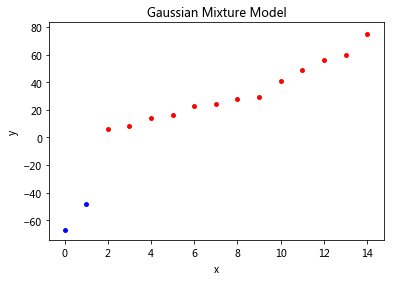

means = [[ 32.98489643 -57.51107027]]
covariances = [[429.45764867  90.24987882]]
weights =  [[0.86682762 0.13317238]]


In [21]:
for i in range(0,len(labels)):
    if labels[i] == 0:
        plt.scatter(i, data.take(i), s=15, c='red')
    elif labels[i] == 1:
        plt.scatter(i, data.take(i), s=15, c='blue')
plt.title('Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("means =", gmmModel.means_.reshape(1, -1))
print("covariances =", gmmModel.covariances_.reshape(1, -1))
print("weights = ", gmmModel.weights_.reshape(1, -1))

### 习题9.4
&emsp;&emsp;EM算法可以用到朴素贝叶斯法的非监督学习，试写出其算法。

**解答：** 
> **EM算法的一般化：**  
**E步骤：**根据参数初始化或上一次迭代的模型参数来计算出隐变量的后验概率，其实就是隐变量的期望。作为隐变量的现估计值：$$w_j^{(i)}=Q_{i}(z^{(i)}=j) := p(z^{(i)}=j | x^{(i)} ; \theta)$$
**M步骤：**将似然函数最大化以获得新的参数值：$$
\theta :=\arg \max_{\theta} \sum_i \sum_{z^{(i)}} Q_i (z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)} ; \theta)}{Q_i (z^{(i)})}
$$  

使用NBMM（朴素贝叶斯的混合模型）中的$\phi_z,\phi_{j|z^{(i)}=1},\phi_{j|z^{(i)}=0}$参数替换一般化的EM算法中的$\theta$参数，然后依次求解$w_j^{(i)}$与$\phi_z,\phi_{j|z^{(i)}=1},\phi_{j|z^{(i)}=0}$参数的更新问题。  
**NBMM的EM算法：**  
**E步骤：**  
$$w_j^{(i)}:=P\left(z^{(i)}=1 | x^{(i)} ; \phi_z, \phi_{j | z^{(i)}=1}, \phi_{j | z^{(i)}=0}\right)$$**M步骤：**$$
\phi_{j | z^{(i)}=1} :=\frac{\displaystyle \sum_{i=1}^{m} w^{(i)} I(x_{j}^{(i)}=1)}{\displaystyle \sum_{i=1}^{m} w^{(i)}} \\ 
\phi_{j | z^{(i)}=0}:= \frac{\displaystyle  \sum_{i=1}^{m}\left(1-w^{(i)}\right) I(x_{j}^{(i)}=1)}{ \displaystyle \sum_{i=1}^{m}\left(1-w^{(i)}\right)} \\ 
\phi_{z^{(i)}} :=\frac{\displaystyle \sum_{i=1}^{m} w^{(i)}}{m} 
$$   

## 第10章隐马尔可夫模型-习题

### 习题10.1
&emsp;&emsp;给定盒子和球组成的隐马尔可夫模型$\lambda=(A,B,\pi)$，其中，$$A=\left[\begin{array}{ccc}0.5&0.2&0.3\\0.3&0.5&0.2\\0.2&0.3&0.5\end{array}\right], \quad B=\left[\begin{array}{cc}0.5&0.5\\0.4&0.6\\0.7&0.3\end{array}\right], \quad \pi=(0.2,0.4,0.4)^T$$设$T=4,O=(红,白,红,白)$，试用后向算法计算$P(O|\lambda)$。

**解答：**

In [22]:
import numpy as np

class HiddenMarkov:
    # 前向算法
    def forward(self, Q, V, A, B, O, PI):
        # 状态序列的大小
        N = len(Q)  
        # 观测序列的大小
        M = len(O)  
        # 初始化前向概率alpha值
        alphas = np.zeros((N, M))
        # 时刻数=观测序列数
        T = M  
        # 遍历每一个时刻，计算前向概率alpha值
        for t in range(T):  
            # 得到序列对应的索引
            indexOfO = V.index(O[t])
            # 遍历状态序列
            for i in range(N):
                # 初始化alpha初值
                if t == 0: 
                    # P176 公式(10.15)
                    alphas[i][t] = PI[t][i] * B[i][indexOfO]  
                    print('alpha1(%d) = p%db%db(o1) = %f' % (i, i, i, alphas[i][t]))
                else:
                    # P176 公式(10.16)
                    alphas[i][t] = np.dot([alpha[t - 1] for alpha in alphas], [a[i] for a in A]) * B[i][indexOfO]  
                    print('alpha%d(%d) = [sigma alpha%d(i)ai%d]b%d(o%d) = %f' % (t, i, t - 1, i, i, t, alphas[i][t]))
        # P176 公式(10.17)
        P = np.sum([alpha[M - 1] for alpha in alphas]) 

    # 后向算法
    def backward(self, Q, V, A, B, O, PI):  
        # 状态序列的大小
        N = len(Q) 
        # 观测序列的大小
        M = len(O) 
        # 初始化后向概率beta值，P178 公式(10.19)
        betas = np.ones((N, M))  
        # 
        for i in range(N):
            print('beta%d(%d) = 1' % (M, i))
        # 对观测序列逆向遍历
        for t in range(M - 2, -1, -1):
            # 得到序列对应的索引
            indexOfO = V.index(O[t + 1])  
             # 遍历状态序列
            for i in range(N):
                # P178 公式(10.20)
                betas[i][t] = np.dot(np.multiply(A[i], [b[indexOfO] for b in B]), [beta[t + 1] for beta in betas])
                realT = t + 1
                realI = i + 1
                print('beta%d(%d) = sigma[a%djbj(o%d)beta%d(j)] = (' % (realT, realI, realI, realT + 1, realT + 1),
                      end='')
                for j in range(N):
                    print("%.2f * %.2f * %.2f + " % (A[i][j], B[j][indexOfO], betas[j][t + 1]), end='')
                print("0) = %.3f" % betas[i][t])
        # 取出第一个值
        indexOfO = V.index(O[0])
        # P178 公式(10.21)
        P = np.dot(np.multiply(PI, [b[indexOfO] for b in B]), [beta[0] for beta in betas])
        print("P(O|lambda) = ", end="")
        for i in range(N):
            print("%.1f * %.1f * %.5f + " % (PI[0][i], B[i][indexOfO], betas[i][0]), end="")
        print("0 = %f" % P)
    
    # 维特比算法
    def viterbi(self, Q, V, A, B, O, PI):
        # 状态序列的大小
        N = len(Q)  
        # 观测序列的大小
        M = len(O)  
        # 初始化daltas
        deltas = np.zeros((N, M))
        # 初始化psis
        psis = np.zeros((N, M))
        # 初始化最优路径矩阵，该矩阵维度与观测序列维度相同
        I = np.zeros((1, M))
        # 遍历观测序列
        for t in range(M):
            # 递推从t=2开始
            realT = t+1
            # 得到序列对应的索引
            indexOfO = V.index(O[t]) 
            for i in range(N):
                realI = i+1
                if t == 0:
                    # P185 算法10.5 步骤(1)
                    deltas[i][t] = PI[0][i] * B[i][indexOfO]
                    psis[i][t] = 0
                    print('delta1(%d) = pi%d * b%d(o1) = %.2f * %.2f = %.2f'%(realI, realI, realI, PI[0][i], B[i][indexOfO], deltas[i][t]))
                    print('psis1(%d) = 0' % (realI))
                else:
                    # # P185 算法10.5 步骤(2)
                    deltas[i][t] = np.max(np.multiply([delta[t-1] for delta in deltas], [a[i] for a in A])) * B[i][indexOfO]
                    print('delta%d(%d) = max[delta%d(j)aj%d]b%d(o%d) = %.2f * %.2f = %.5f'%(realT, realI, realT-1, realI, realI, realT, np.max(np.multiply([delta[t-1] for delta in deltas], [a[i] for a in A])), B[i][indexOfO], deltas[i][t]))
                    psis[i][t] = np.argmax(np.multiply([delta[t-1] for delta in deltas], [a[i] for a in A]))
                    print('psis%d(%d) = argmax[delta%d(j)aj%d] = %d' % (realT, realI, realT-1, realI, psis[i][t]))
        #print(deltas)
        #print(psis)
        # 得到最优路径的终结点
        I[0][M-1] = np.argmax([delta[M-1] for delta in deltas])
        print('i%d = argmax[deltaT(i)] = %d' % (M, I[0][M-1]+1))
        # 递归由后向前得到其他结点
        for t in range(M-2, -1, -1):
            I[0][t] = psis[int(I[0][t+1])][t+1]
            print('i%d = psis%d(i%d) = %d' % (t+1, t+2, t+2, I[0][t]+1))
        # 输出最优路径
        print('最优路径是：',"->".join([str(int(i+1)) for i in I[0]]))

In [23]:
Q = [1, 2, 3]
V = ['红', '白']
A = [[0.5, 0.2, 0.3], [0.3, 0.5, 0.2], [0.2, 0.3, 0.5]]
B = [[0.5, 0.5], [0.4, 0.6], [0.7, 0.3]]
O = ['红', '白', '红', '白'] 
PI = [[0.2, 0.4, 0.4]]

HMM = HiddenMarkov()
HMM.backward(Q, V, A, B, O, PI)

beta4(0) = 1
beta4(1) = 1
beta4(2) = 1
beta3(1) = sigma[a1jbj(o4)beta4(j)] = (0.50 * 0.50 * 1.00 + 0.20 * 0.60 * 1.00 + 0.30 * 0.30 * 1.00 + 0) = 0.460
beta3(2) = sigma[a2jbj(o4)beta4(j)] = (0.30 * 0.50 * 1.00 + 0.50 * 0.60 * 1.00 + 0.20 * 0.30 * 1.00 + 0) = 0.510
beta3(3) = sigma[a3jbj(o4)beta4(j)] = (0.20 * 0.50 * 1.00 + 0.30 * 0.60 * 1.00 + 0.50 * 0.30 * 1.00 + 0) = 0.430
beta2(1) = sigma[a1jbj(o3)beta3(j)] = (0.50 * 0.50 * 0.46 + 0.20 * 0.40 * 0.51 + 0.30 * 0.70 * 0.43 + 0) = 0.246
beta2(2) = sigma[a2jbj(o3)beta3(j)] = (0.30 * 0.50 * 0.46 + 0.50 * 0.40 * 0.51 + 0.20 * 0.70 * 0.43 + 0) = 0.231
beta2(3) = sigma[a3jbj(o3)beta3(j)] = (0.20 * 0.50 * 0.46 + 0.30 * 0.40 * 0.51 + 0.50 * 0.70 * 0.43 + 0) = 0.258
beta1(1) = sigma[a1jbj(o2)beta2(j)] = (0.50 * 0.50 * 0.25 + 0.20 * 0.60 * 0.23 + 0.30 * 0.30 * 0.26 + 0) = 0.112
beta1(2) = sigma[a2jbj(o2)beta2(j)] = (0.30 * 0.50 * 0.25 + 0.50 * 0.60 * 0.23 + 0.20 * 0.30 * 0.26 + 0) = 0.122
beta1(3) = sigma[a3jbj(o2)beta2(j)] = (0.20 * 0.50 * 0.25

可得$P(O|\lambda) = 0.060091$

### 习题10.2

&emsp;&emsp;给定盒子和球组成的隐马尔可夫模型$\lambda=(A,B,\pi)$，其中，$$A=\left[\begin{array}{ccc}0.5&0.1&0.4\\0.3&0.5&0.2\\0.2&0.2&0.6\end{array}\right], \quad B=\left[\begin{array}{cc}0.5&0.5\\0.4&0.6\\0.7&0.3\end{array}\right], \quad \pi=(0.2,0.3,0.5)^T$$设$T=8,O=(红,白,红,红,白,红,白,白)$，试用前向后向概率计算$P(i_4=q_3|O,\lambda)$

**解答：**

In [24]:
Q = [1, 2, 3]
V = ['红', '白']
A = [[0.5, 0.1, 0.4], [0.3, 0.5, 0.2], [0.2, 0.2, 0.6]]
B = [[0.5, 0.5], [0.4, 0.6], [0.7, 0.3]]
O = ['红', '白', '红', '红', '白', '红', '白', '白']
PI = [[0.2, 0.3, 0.5]]

HMM = HiddenMarkov()
HMM.forward(Q, V, A, B, O, PI)
HMM.backward(Q, V, A, B, O, PI)

alpha1(0) = p0b0b(o1) = 0.100000
alpha1(1) = p1b1b(o1) = 0.120000
alpha1(2) = p2b2b(o1) = 0.350000
alpha1(0) = [sigma alpha0(i)ai0]b0(o1) = 0.078000
alpha1(1) = [sigma alpha0(i)ai1]b1(o1) = 0.084000
alpha1(2) = [sigma alpha0(i)ai2]b2(o1) = 0.082200
alpha2(0) = [sigma alpha1(i)ai0]b0(o2) = 0.040320
alpha2(1) = [sigma alpha1(i)ai1]b1(o2) = 0.026496
alpha2(2) = [sigma alpha1(i)ai2]b2(o2) = 0.068124
alpha3(0) = [sigma alpha2(i)ai0]b0(o3) = 0.020867
alpha3(1) = [sigma alpha2(i)ai1]b1(o3) = 0.012362
alpha3(2) = [sigma alpha2(i)ai2]b2(o3) = 0.043611
alpha4(0) = [sigma alpha3(i)ai0]b0(o4) = 0.011432
alpha4(1) = [sigma alpha3(i)ai1]b1(o4) = 0.010194
alpha4(2) = [sigma alpha3(i)ai2]b2(o4) = 0.011096
alpha5(0) = [sigma alpha4(i)ai0]b0(o5) = 0.005497
alpha5(1) = [sigma alpha4(i)ai1]b1(o5) = 0.003384
alpha5(2) = [sigma alpha4(i)ai2]b2(o5) = 0.009288
alpha6(0) = [sigma alpha5(i)ai0]b0(o6) = 0.002811
alpha6(1) = [sigma alpha5(i)ai1]b1(o6) = 0.002460
alpha6(2) = [sigma alpha5(i)ai2]b2(o6) = 0.002535
a

可知，$\displaystyle P(i_4=q_3|O,\lambda)=\frac{P(i_4=q_3,O|\lambda)}{P(O|\lambda)}=\frac{\alpha_4(3)\beta_4(3)}{P(O|\lambda)}$

In [25]:
result = (0.011096 * 0.043) / 0.003477
print("P(i4=q3|O,lambda) =",result)

P(i4=q3|O,lambda) = 0.13722404371584698


### 习题10.3

&emsp;&emsp;在习题10.1中，试用维特比算法求最优路径$I^*=(i_1^*,i_2^*,i_3^*,i_4^*)$。

In [26]:
Q = [1, 2, 3]
V = ['红', '白']
A = [[0.5, 0.2, 0.3], [0.3, 0.5, 0.2], [0.2, 0.3, 0.5]]
B = [[0.5, 0.5], [0.4, 0.6], [0.7, 0.3]]
O = ['红', '白', '红', '白'] 
PI = [[0.2, 0.4, 0.4]]

HMM = HiddenMarkov()
HMM.viterbi(Q, V, A, B, O, PI)

delta1(1) = pi1 * b1(o1) = 0.20 * 0.50 = 0.10
psis1(1) = 0
delta1(2) = pi2 * b2(o1) = 0.40 * 0.40 = 0.16
psis1(2) = 0
delta1(3) = pi3 * b3(o1) = 0.40 * 0.70 = 0.28
psis1(3) = 0
delta2(1) = max[delta1(j)aj1]b1(o2) = 0.06 * 0.50 = 0.02800
psis2(1) = argmax[delta1(j)aj1] = 2
delta2(2) = max[delta1(j)aj2]b2(o2) = 0.08 * 0.60 = 0.05040
psis2(2) = argmax[delta1(j)aj2] = 2
delta2(3) = max[delta1(j)aj3]b3(o2) = 0.14 * 0.30 = 0.04200
psis2(3) = argmax[delta1(j)aj3] = 2
delta3(1) = max[delta2(j)aj1]b1(o3) = 0.02 * 0.50 = 0.00756
psis3(1) = argmax[delta2(j)aj1] = 1
delta3(2) = max[delta2(j)aj2]b2(o3) = 0.03 * 0.40 = 0.01008
psis3(2) = argmax[delta2(j)aj2] = 1
delta3(3) = max[delta2(j)aj3]b3(o3) = 0.02 * 0.70 = 0.01470
psis3(3) = argmax[delta2(j)aj3] = 2
delta4(1) = max[delta3(j)aj1]b1(o4) = 0.00 * 0.50 = 0.00189
psis4(1) = argmax[delta3(j)aj1] = 0
delta4(2) = max[delta3(j)aj2]b2(o4) = 0.01 * 0.60 = 0.00302
psis4(2) = argmax[delta3(j)aj2] = 1
delta4(3) = max[delta3(j)aj3]b3(o4) = 0.01 * 0.30 = 0.0

### 习题10.4
&emsp;&emsp;试用前向概率和后向概率推导$$P(O|\lambda)=\sum_{i=1}^N\sum_{j=1}^N\alpha_t(i)a_{ij}b_j(o_{t+1})\beta_{t+1}(j),\quad t=1,2,\cdots,T-1$$

**解答：**  
$$\begin{aligned}
P(O|\lambda)
&= P(o_1,o_2,...,o_T|\lambda) \\
&= \sum_{i=1}^N P(o_1,..,o_t,i_t=q_i|\lambda) P(o_{t+1},..,o_T|i_t=q_i,\lambda) \\
&= \sum_{i=1}^N \sum_{j=1}^N P(o_1,..,o_t,i_t=q_i|\lambda) P(o_{t+1},i_{t+1}=q_j|i_t=q_i,\lambda)P(o_{t+2},..,o_T|i_{t+1}=q_j,\lambda) \\
&= \sum_{i=1}^N \sum_{j=1}^N P(o_1,..,o_t,i_t=q_i|\lambda) P(o_{t+1}|i_{t+1}=q_j,\lambda) P(i_{t+1}=q_j|i_t=q_i,\lambda) P(o_{t+2},..,o_T|i_{t+1}=q_j,\lambda) \\
&= \sum_{i=1}^N \sum_{j=1}^N \alpha_t(i) a_{ij} b_j(o_{t+1}) \beta_{t+1}(j),{\quad}t=1,2,...,T-1
\end{aligned}$$
命题得证。

### 习题10.5

&emsp;&emsp;比较维特比算法中变量$\delta$的计算和前向算法中变量$\alpha$的计算的主要区别。

**解答：**  
**前向算法：**  
1. 初值$$\alpha_1(i)=\pi_ib_i(o_i),i=1,2,\cdots,N$$
2. 递推，对$t=1,2,\cdots,T-1$：$$\alpha_{t+1}(i)=\left[\sum_{j=1}^N \alpha_t(j) a_{ji} \right]b_i(o_{t+1})，i=1,2,\cdots,N$$

**维特比算法：**  
1. 初始化$$\delta_1(i)=\pi_ib_i(o_1),i=1,2,\cdots,N$$
2. 递推，对$t=2,3,\cdots,T$$$\delta_t(i)=\max_{1 \leqslant j \leqslant N} [\delta_{t-1}(j)a_{ji}]b_i(o_t), i=1,2,\cdots,N$$  

&emsp;&emsp;由上面算法可知，计算变量$\alpha$的时候直接对上个的结果进行数值计算，而计算变量$\delta$需要在上个结果计算的基础上选择最大值

## 第11章条件随机场-习题

### 习题11.1
&emsp;&emsp;写出图11.3中无向图描述的概率图模型的因子分解式。
<br/><center>
<img style="border-radius: 0.3125em;box-shadow: 0 2px 4px 0 rgba(34,36,38,.12),0 2px 10px 0 rgba(34,36,38,.08);" src="../images/11-1-Maximal-Clique.png"><br><div style="color:orange; border-bottom: 1px solid #d9d9d9;display: inline-block;color: #000;padding: 2px;">图11.3 无向图的团和最大团</div></center>

**解答：**  
&emsp;&emsp;图11.3表示由4个结点组成的无向图。图中由2个结点组成的团有5个：$\{Y_1,Y_2\},\{Y_2,Y_3\},\{Y_3,Y_4\},\{Y_4,Y_2\}$和$\{Y_1,Y_3\}$，有2个最大团：$\{Y_1,Y_2,Y_3\}$和$\{Y_2,Y_3,Y_4\}$，而$\{Y_1,Y_2,Y_3,Y_4\}$不是一个团，因为$Y_1$和$Y_4$没有边连接。  
&emsp;&emsp;根据概率图模型的因子分解定义：将概率无向图模型的联合概率分布表示为其最大团上的随机变量的函数的乘积形式的操作。公式在书中(11.5)，(11.6)。  
$$P(Y)=\frac{\Psi_{(1,2,3)}(Y_{(1,2,3)})\cdot\Psi_{(2,3,4)}(Y_{(2,3,4)})}{\displaystyle \sum_Y \left[ \Psi_{(1,2,3)}(Y_{(1,2,3)})\cdot\Psi_{(2,3,4)}(Y_{(2,3,4)})\right]}$$

### 习题11.2

&emsp;&emsp;证明$Z(x)=a_n^T(x) \cdot \boldsymbol{1} = \boldsymbol{1}^T\cdot\beta_1(x)$，其中$\boldsymbol{1}$是元素均为1的$m$维列向量。

**解答：**  
**第1步：**证明$Z(x)=a_n^T(x) \cdot \boldsymbol{1}$  
根据条件随机场的矩阵形式：$$(M_{n+1}(x))_{i,j}=\begin{cases}
1,&j=\text{stop}\\
0,&\text{otherwise}
\end{cases}$$根据前向向量的定义：$$\alpha_0(y|x)=\begin{cases}
1,&y=\text{start} \\
0,&\text{otherwise}
\end{cases}$$  
$\begin{aligned}
\therefore Z_n(x) 
&= \left(M_1(x)M_2(x){\cdots}M_{n+1}(x)\right)_{(\text{start},\text{stop})} \\
&= \alpha_0(x)^T M_1(x)M_2(x){\cdots}M_n(x) \cdot 1\\
&=\alpha_n(x)^T\cdot \boldsymbol{1}
\end{aligned}$  

-----

**第2步：**证明$Z(x)=\boldsymbol{1}^T \cdot \beta_1(x)$  
根据条件随机场的矩阵形式：$$(M_{n+1}(x))_{i,j}=\begin{cases}
1,&j=\text{stop}\\
0,&\text{otherwise}
\end{cases}$$根据后向向量定义：$$\beta_{n+1}(y_{n+1}|x)=
\begin{cases}
1,& y_{n+1}=\text{stop} \\
0,& \text{otherwise}
\end{cases}$$  
$\begin{aligned}
\therefore Z_n(x)
&= (M_1(x)M_2(x) \cdots M_{n+1}(x))_{(\text{start},\text{stop})} \\
&= (M_1(x)M_2(x) \cdots M_n(x) \beta_{n+1}(x))_{\text{start}} \\
&=(\beta_1(x))_{\text{start}} \\
&=\boldsymbol{1}^T \cdot \beta_1(x)
\end{aligned}$  
综上所述：$Z(x)=a_n^T(x) \cdot \boldsymbol{1} = \boldsymbol{1}^T \cdot \beta_1(x)$，命题得证。  

### 习题11.3
&emsp;&emsp;写出条件随机场模型学习的梯度下降法。

**解答：**  
条件随机场的对数极大似然函数为：$$L(w)=\sum^N_{j=1} \sum^K_{k=1} w_k f_k(y_j,x_j)-\sum^N_{j=1} \log{Z_w(x_j)}$$梯度下降算法的目标函数是$f(w)=-L(w)$  
目标函数的梯度为：$$g(w)=\frac{\nabla{f(w)}}{\nabla{w}}=\left(\frac{\partial{f(w)}}{\partial{w_1}},\frac{\partial{f(w)}}{\partial{w_2}},\cdots,\frac{\partial{f(w)}}{\partial{w_k}}\right)$$其中$$\begin{aligned}
\frac{\partial{f(w)}}{\partial{w_i}}
&= -\sum^N_{j=1} w_i f_i(y_j,x_j) + \sum^N_{j=1} \frac{1}{Z_w(x_j)} \cdot \frac{\partial{Z_w(x_j)}}{\partial{w_i}}\\
&= -\sum^N_{j=1}w_if_i(y_j,x_j)+\sum^N_{j=1}\frac{1}{Z_w(x_j)}\sum_y(\exp{\sum^K_{k=1}w_kf_k(y,x_j))}w_if_i(y,x_j)
\end{aligned}$$  
根据梯度下降算法：  
1. 取初始值$w^{(0)} \in \mathbf{R}^n$，置$k=0$  
2. 计算$f(w^{(k)})$  
3. 计算梯度$g_k=g(w^{(k)})$，当$\|g_k\|<\varepsilon$时，停止迭代，令$w^*=w^{(k)}$；否则令$p_k=-g(w^{(k)})$，求$\lambda_k$，使$$
f(w^{(k)}+\lambda_k p_k)=\min_{\lambda \geqslant 0}{f(w^{(k)}+\lambda p_k)}$$  
4. 置$w^{(k+1)}=w^{(k)}+\lambda_k p_k$，计算$f(w^{(k+1)})$  
当$\|f(w^{(k+1)})-f(w^{(k)})\| < \epsilon$或$\|w^{(k+1)}-w^{(k)}\| < \epsilon$时，停止迭代，令$w^*=w^{(k+1)}$  
5. 否则，置$k=k+1$，转(3).

### 习题11.4

参考图11.6的状态路径图，假设随机矩阵$M_1(x),M_2(x),M_3(x),M_4(x)$分别是
$$M_1(x)=\begin{bmatrix}0&0\\0.5&0.5\end{bmatrix} ,
M_2(x)=\begin{bmatrix}0.3&0.7\\0.7&0.3\end{bmatrix}$$
$$
M_3(x)=\begin{bmatrix}0.5&0.5\\0.6&0.4\end{bmatrix},
M_4(x)=\begin{bmatrix}0&1\\0&1\end{bmatrix}$$
求以$start=2$为起点$stop=2$为终点的所有路径的状态序列$y$的概率及概率最大的状态序列。

**解答：**

In [27]:
import numpy as np

# 创建随机矩阵
M1 = [[0,0],[0.5,0.5]] 
M2 = [[0.3, 0.7], [0.7,0.3]]
M3 = [[0.5, 0.5], [0.6, 0.4]]
M4 = [[0, 1], [0, 1]]
M = [M1, M2, M3, M4]
print(M)

[[[0, 0], [0.5, 0.5]], [[0.3, 0.7], [0.7, 0.3]], [[0.5, 0.5], [0.6, 0.4]], [[0, 1], [0, 1]]]


In [28]:
# 生成路径
path = [2]
for i in range(1,4):
    paths = []
    for _, r in enumerate(path):
        temp = np.transpose(r)
        paths.append(np.append(temp, 1))
        paths.append(np.append(temp, 2))
    path = paths.copy()

path = [np.append(r, 2) for _, r in enumerate(path)]
print(path)

[array([2, 1, 1, 1, 2]), array([2, 1, 1, 2, 2]), array([2, 1, 2, 1, 2]), array([2, 1, 2, 2, 2]), array([2, 2, 1, 1, 2]), array([2, 2, 1, 2, 2]), array([2, 2, 2, 1, 2]), array([2, 2, 2, 2, 2])]


In [29]:
# 计算概率

pr = []
for _, row in enumerate(path):
    p = 1
    for i in range(len(row)-1):
        a = row[i]
        b = row[i+1]
        p *= M[i][a-1][b-1]
    pr.append((row.tolist(), p))
pr = sorted(pr, key=lambda x : x[1], reverse=True)
print(pr)

[([2, 1, 2, 1, 2], 0.21), ([2, 2, 1, 1, 2], 0.175), ([2, 2, 1, 2, 2], 0.175), ([2, 1, 2, 2, 2], 0.13999999999999999), ([2, 2, 2, 1, 2], 0.09), ([2, 1, 1, 1, 2], 0.075), ([2, 1, 1, 2, 2], 0.075), ([2, 2, 2, 2, 2], 0.06)]


In [30]:
# 打印结果
print("以start=2为起点stop=2为终点的所有路径的状态序列y的概率为：")
for path, p in pr:
    print("    路径为：" + "->".join([ str(x) for x in path]) ,end=" ")
    print("概率为：" + str(p))
print("概率[" + str(pr[0][1]) +"]最大的状态序列为：" + "->".join([str(x) for x in pr[0][0]]), end = " ")

以start=2为起点stop=2为终点的所有路径的状态序列y的概率为：
    路径为：2->1->2->1->2 概率为：0.21
    路径为：2->2->1->1->2 概率为：0.175
    路径为：2->2->1->2->2 概率为：0.175
    路径为：2->1->2->2->2 概率为：0.13999999999999999
    路径为：2->2->2->1->2 概率为：0.09
    路径为：2->1->1->1->2 概率为：0.075
    路径为：2->1->1->2->2 概率为：0.075
    路径为：2->2->2->2->2 概率为：0.06
概率[0.21]最大的状态序列为：2->1->2->1->2 